In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
df_risk = pd.read_csv("risk_depression.csv")
df_notrisk = pd.read_csv("notrisk_depression.csv")

In [3]:
df_risk.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df_notrisk.head(5)

,4,1677873315,Sat May 02 04:26:28 PDT 2009,NO_QUERY,Nattie09,"@MissJoJoSmith good !!, awww thats good then glad its better !!, yh am good tar!!"
0,4,1677873325,Sat May 02 04:26:28 PDT 2009,NO_QUERY,dougberrysoc,@ThetaHealerMaya That's the key: try to keep t...
1,4,1677873353,Sat May 02 04:26:29 PDT 2009,NO_QUERY,isully,Bored... anyone know what I could do in London...
2,4,1677873370,Sat May 02 04:26:29 PDT 2009,NO_QUERY,frankidurbin,"@arnteriksen morning, by the way"
3,4,1677873387,Sat May 02 04:26:29 PDT 2009,NO_QUERY,katie_oneill,"watching x-ment, the last stand. lol.... just ..."
4,4,1677873417,Sat May 02 04:26:30 PDT 2009,NO_QUERY,curtisrsmith,"@d2theory way too deep at 6:24am, Bell. I'm de..."


In [5]:
df_risk.shape, df_notrisk.shape

((6998, 6), (6999, 6))

In [6]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
df_risk.columns = DATASET_COLUMNS
df_notrisk.columns = DATASET_COLUMNS

In [7]:
df_risk.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
df_notrisk.head()

,target,ids,date,flag,user,text
0,4,1677873325,Sat May 02 04:26:28 PDT 2009,NO_QUERY,dougberrysoc,@ThetaHealerMaya That's the key: try to keep t...
1,4,1677873353,Sat May 02 04:26:29 PDT 2009,NO_QUERY,isully,Bored... anyone know what I could do in London...
2,4,1677873370,Sat May 02 04:26:29 PDT 2009,NO_QUERY,frankidurbin,"@arnteriksen morning, by the way"
3,4,1677873387,Sat May 02 04:26:29 PDT 2009,NO_QUERY,katie_oneill,"watching x-ment, the last stand. lol.... just ..."
4,4,1677873417,Sat May 02 04:26:30 PDT 2009,NO_QUERY,curtisrsmith,"@d2theory way too deep at 6:24am, Bell. I'm de..."


In [9]:
df_marge = pd.concat([df_risk, df_notrisk], axis =0 )
df_marge.head(10)

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [10]:
df_marge.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [11]:
df = df_marge.drop(["date","flag"], axis = 1)

In [12]:
df.isnull().sum()

target    0
ids       0
user      0
text      0
dtype: int64

In [13]:
data_target = df.groupby('target')
df['target'].value_counts()

4    6999
0    6998
Name: target, dtype: int64

In [14]:
df = df.sample(frac = 1, random_state=42)
df.head()

,target,ids,user,text
2900,0,2060059978,nsalbakri,my final day of diving..
3143,0,2060119018,EmmaHerdman,@GlobeAlone74 haaa yh only another 4 years y...
1233,4,1678091009,andreapender,good morning...off to the bookstore
3855,0,2060284601,MagicNeverEnds,Party over. Had AWESOME time at niece's 1 yr ...
1047,4,1678053347,melbm,could listen to it all day long &lt;3


In [15]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [16]:
df.columns

Index(['target', 'ids', 'user', 'text'], dtype='object')

In [17]:
df.head()

,target,ids,user,text
0,0,2060059978,nsalbakri,my final day of diving..
1,0,2060119018,EmmaHerdman,@GlobeAlone74 haaa yh only another 4 years y...
2,4,1678091009,andreapender,good morning...off to the bookstore
3,0,2060284601,MagicNeverEnds,Party over. Had AWESOME time at niece's 1 yr ...
4,4,1678053347,melbm,could listen to it all day long &lt;3


In [18]:
# Clean data

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub("http\S+", "", text)
    text = re.sub("http", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)   
    return text

In [19]:
df["text"] = df["text"].apply(wordopt)

In [20]:
# Tokenization and Removing Stopwords with nltk

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

def nltk_text_filter(text):
    word_tokens = word_tokenize(text) 
    
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df['text'] = df['text'].apply(lambda x: nltk_text_filter(x))
df.head()

,target,ids,user,text
0,0,2060059978,nsalbakri,final day diving
1,0,2060119018,EmmaHerdman,haaa yh another years yaaay lol
2,4,1678091009,andreapender,good morning bookstore
3,0,2060284601,MagicNeverEnds,party awesome time niece yr birthday driving b...
4,4,1678053347,melbm,could listen day long lt


In [22]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lem_words(text):
    return " ".join([lemmatizer.lemmatize(w) for w in text.split()])

df["text"] = df["text"].apply(lambda x: lem_words(x))
df.head()

,target,ids,user,text
0,0,2060059978,nsalbakri,final day diving
1,0,2060119018,EmmaHerdman,haaa yh another year yaaay lol
2,4,1678091009,andreapender,good morning bookstore
3,0,2060284601,MagicNeverEnds,party awesome time niece yr birthday driving b...
4,4,1678053347,melbm,could listen day long lt


In [23]:
from collections import Counter
cnt = Counter()

for text in df['text'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('day', 915),
 ('good', 873),
 ('get', 728),
 ('like', 719),
 ('quot', 668),
 ('go', 652),
 ('today', 629),
 ('u', 622),
 ('work', 590),
 ('time', 559)]

In [24]:
# Plot the word cloud

from wordcloud import WordCloud

import matplotlib.pyplot as plt
sentences = df['text'].tolist()

In [25]:
# Joining sentences (combining all the sentences that we have)

joined_sentences = " ".join(sentences)

In [26]:
positive_tweets = df[df['target'] == 4]
positive_sentences = positive_tweets['text'].tolist()
positive_string = " ".join(positive_sentences)

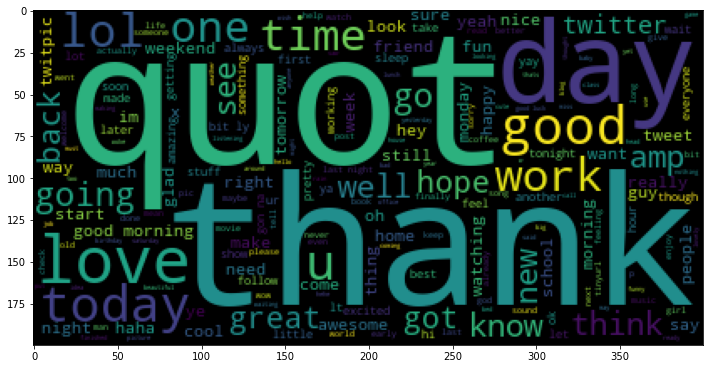

In [27]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(positive_string));

In [28]:
negative_tweets = df[df['target'] == 0]
negative_sentences = negative_tweets['text'].tolist()
negative_string = " ".join(negative_sentences)

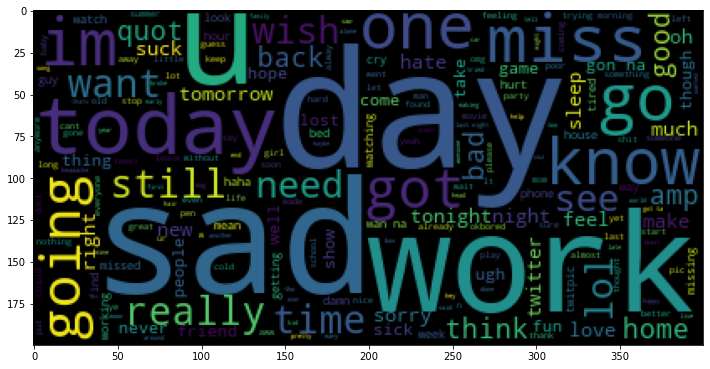

In [29]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(negative_string));

In [30]:
x = df["text"]
y = df["target"]

In [31]:
x

0                                         final day diving
1                           haaa yh another year yaaay lol
2                                   good morning bookstore
3        party awesome time niece yr birthday driving b...
4                                 could listen day long lt
                               ...                        
13992                moneyinxxx yeah im already contracted
13993    try make thanx twitterville allowing vent ball...
13994    hockey game going way supposed go penguin need...
13995    going nice tomorrow rain come back nice weathe...
13996    another one wheezywaiter marathon followed lev...
Name: text, Length: 13997, dtype: object

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [34]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)

In [35]:
LR.score(xv_test, y_test)

0.7692857142857142

In [36]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       729
           4       0.74      0.81      0.77       671

    accuracy                           0.77      1400
   macro avg       0.77      0.77      0.77      1400
weighted avg       0.77      0.77      0.77      1400



In [37]:
pred_lr.shape

(1400,)

In [38]:
# Bayes

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(xv_train, y_train)
pred_mnb = mnb.predict(xv_test)
mnb.score(xv_test, y_test)

0.7678571428571429

In [39]:
mnb.score(xv_test, y_test)

0.7678571428571429

In [40]:
print(classification_report(y_test, pred_mnb))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       729
           4       0.76      0.76      0.76       671

    accuracy                           0.77      1400
   macro avg       0.77      0.77      0.77      1400
weighted avg       0.77      0.77      0.77      1400



In [41]:
pred_mnb.shape

(1400,)

In [42]:
#Evaluation of Model - Confusion Matrix Plot
from sklearn.metrics import confusion_matrix
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [43]:
# Compute confusion matrix Logistic Regression
lr_matrix = confusion_matrix(y_test, pred_lr)

Confusion matrix, without normalization
[[534 195]
 [128 543]]


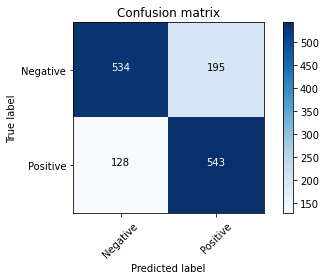

In [44]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(lr_matrix, classes=['Negative','Positive'])

In [45]:
# Compute confusion matrix Naive Bayes
mnb_matrix = confusion_matrix(y_test, pred_mnb)

Confusion matrix, without normalization
[[565 164]
 [161 510]]


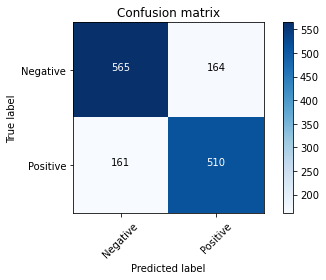

In [46]:
# Plot non-normalized confusion matrix 
plt.figure()
plot_confusion_matrix(mnb_matrix, classes=['Negative','Positive'])

In [47]:
# AUC Logistic Regression
from sklearn import metrics
y_pred_proba = LR.predict_proba(xv_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

0.8495243877757539


In [48]:
# AUC Naive Bayes
from sklearn import metrics
y_pred_proba = mnb.predict_proba(xv_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

0.8509329277392423


In [49]:
# ทดสอบการใช้งานโมเดล

def output_label(n):
    if n == 0:
        return "Negative"
    elif n == 4:
        return "Positive"
    
def manual_testing(text):
    testing = {"text":[tweet]}
    new_def_test = pd.DataFrame(testing)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)   # Clean
    new_def_test["text"] = new_def_test["text"].apply(nltk_text_filter)   # Stopwords
    new_def_test["text"] = new_def_test["text"].apply(lem_words)   # Lemmatize
    
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)   #IFIDF
    pred_LR = LR.predict(new_xv_test)   # Logistic Regression
    pred_MNB = mnb.predict(new_xv_test)   # Naive Bayes

    return print("\nLR Prediction: {} \nMNB Prediction: {}"
                 .format(output_label(pred_LR[0]),
                        output_label(pred_MNB[0])))

In [50]:
tweet = str(input())
manual_testing(tweet)

today is a good day

LR Prediction: Positive 
MNB Prediction: Positive
